In [49]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib

In [39]:
M = 1.0
R = 1.0
G = 1.0
v_esc = np.sqrt(2*G*M/R)
v_rel = v_esc/2.0

b_scat = R*(v_esc/v_rel)**2
b_coll = R*np.sqrt(1 + (v_esc/v_rel)**2)

x_0 = -10.0
vx_0 = v_rel
vy_0 = 0

def pointgrav2D(t, coords, G, M):
    x , y, vx, vy = coords
    F = G*M/(np.sqrt(x**2 + y**2)**2)
    dx = vx
    dy = vy
    dvx = -F*(x/np.sqrt(x**2 + y**2))
    dvy = -F*(y/np.sqrt(x**2 + y**2))
    return dx, dy, dvx, dvy

steps = 100
t_0 = 0.0
t_f = 100.0
t = np.linspace(t_0, t_f, steps)
# y_0= 1.0
# sol = solve_ivp(pointgrav2D, [t_0,t_f], coords_0, t_eval=t, args= (G,M))

In [40]:
y_0 = b_scat
coords_0 = [x_0, y_0, vx_0, vy_0]
sol1 = solve_ivp(pointgrav2D, [t_0,t_f], coords_0, t_eval=t, args= (G,M))
x1 = sol1.y[0]
y1 = sol1.y[1]

In [41]:
y_0 = 2.0*b_scat
coords_0 = [x_0, y_0, vx_0, vy_0]
sol2 = solve_ivp(pointgrav2D, [t_0,t_f], coords_0, t_eval=t, args= (G,M))
x2 = sol2.y[0]
y2 = sol2.y[1]

In [42]:
y_0 = b_coll
coords_0 = [x_0, y_0, vx_0, vy_0]
sol3 = solve_ivp(pointgrav2D, [t_0,t_f], coords_0, t_eval=t, args= (G,M))
x3 = sol3.y[0]
y3 = sol3.y[1]

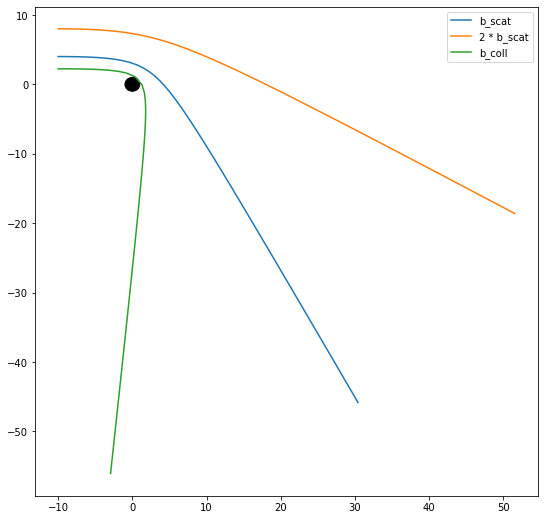

In [63]:
fig, ax = plt.subplots(figsize=(9, 9))

ax.plot(x1,y1,label = 'b_scat') #heavy scat
ax.plot(x2,y2,label = '2 * b_scat') #weak scat
ax.plot(x3,y3,label = 'b_coll') #collision
circle = plt.Circle((0,0),1,color='black')
ax.add_artist(circle)

plt.legend()